In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [60]:
filename = './run1/returns/stats.pkl'
filename2 = './run2/returns/stats.pkl'
files = ["./run{}/returns/stats.pkl".format(i) for i in range(5)]
files.append("./adam_001/returns/stats.pkl")
files.remove(filename)
files.remove(filename2)

In [5]:
print(files)

['./run0/returns/stats.pkl', './run1/returns/stats.pkl', './run3/returns/stats.pkl', './run4/returns/stats.pkl', './adam_001/returns/stats.pkl']


In [140]:
with open(filename, 'rb') as f:
    stats = pickle.load(f)

In [141]:
print(stats.keys())

dict_keys(['cycle_time', 'eps_len', 'batch', 'mini_batch', 'epoch_count', 'ep_time', 'total_returns', 'update_eps', 'time_at_end_eps', 'time_at_end_update', 'start_time', 'optimizer', 'lr'])


In [142]:
# print(stats['total_returns'])
# print(stats['update_eps'])
print(len(stats['total_returns']))
print(stats['total_steps'])
print("Cycle Time : {}".format(stats['cycle_time']))
print("Batch Size : {}".format(stats['batch']))
print("Mini Batch : {}".format(stats['mini_batch']))
# print(stats['batch'])
# print(stats['mini_batch'])


574


KeyError: 'total_steps'

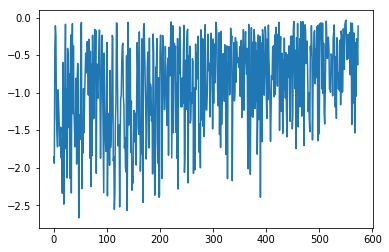

In [143]:
plt.plot(stats['total_returns'])

In [144]:
print(stats['update_eps'][1] - stats['update_eps'][0]) 
eps_interval = stats['update_eps'][1] - stats['update_eps'][0]
a = np.array(stats['total_returns'])
# print(a[:40])
l = len(a) - len(a)%eps_interval
a = a[:l]
print(len(a))
# print(a.reshape([-1,20]))
b = a.reshape([-1,eps_interval])
c = np.mean(b, axis = 1)
print(c.shape)
# .reshape([-1,20])

41
574
(14,)


In [145]:
plt.xlabel('Time Steps')
plt.ylabel('Average R
           eturn averaged over 41 episodes')
# plt.plot(np.array(stats['update_eps'][1:])*50, c)
plt.plot(c)

SyntaxError: EOL while scanning string literal (<ipython-input-145-972bb4c727ae>, line 2)

20
800
(40,)


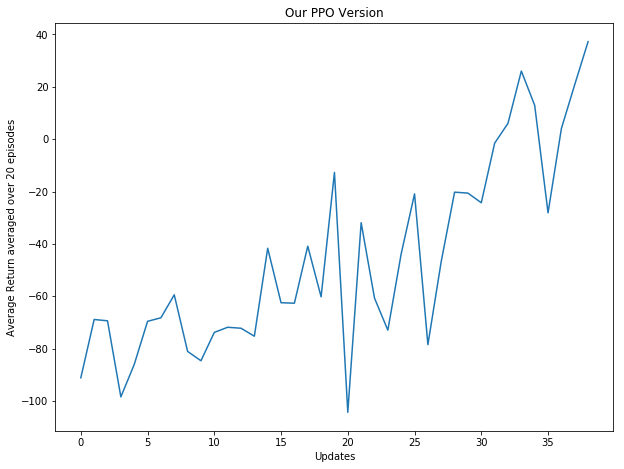

In [8]:
filename= './runur5_scaledaction_1e3_lr2/returns/stats.pkl'
with open(filename, 'rb') as f:
    stats = pickle.load(f)
plt.figure(figsize=(10,7.5))
print(stats['update_eps'][1] - stats['update_eps'][0]) 
eps_interval = stats['update_eps'][1] - stats['update_eps'][0]
a = np.array(stats['total_returns'])
# print(a[:40])
l = len(a) - len(a)%eps_interval
a = a[:l]
print(len(a))
# print(a.reshape([-1,20]))
b = a.reshape([-1,eps_interval])
c = np.mean(b, axis = 1)
print(c.shape)

# .reshape([-1,20])
plt.xlabel('Updates')
plt.title("Our PPO Version")
plt.ylabel('Average Return averaged over 20 episodes')
# plt.plot(np.array(stats['update_eps'][1:])*50, c)
plt.plot(c[:-1])




In [27]:
from datetime import datetime, timedelta
stats_list = []
for fil in files:
    with open(fil, 'rb') as f:
        stats_list.append( pickle.load(f) ) 
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
times_averaged = np.zeros([5, 30])
for i,stats in enumerate(stats_list):
    times_averaged[i] =  stats['time_at_end_update'][:30]
# print(times_averaged)
times_avg  = np.mean(times_averaged, axis =0)

for stats in stats_list:
#     print(stats['update_eps'][1] - stats['update_eps'][0]) 
    eps_interval = stats['update_eps'][1] - stats['update_eps'][0]
    a = np.array(stats['total_returns'])
    # print(a[:40])
    l = len(a) - len(a)%eps_interval
    a = a[:l]
#     print(len(a))
    # print(a.reshape([-1,20]))
    b = a.reshape([-1,eps_interval])
    c = np.mean(b, axis = 1)
    ax1.plot(np.array(list(range(30)))*41*50, c[:30])
ax1.set_xlabel('Transitions')
ax1.set_ylabel('Average Return averaged over 41 episodes')
# plt.title("Learning Curves")


new_tick_locations = np.array(list(range(30)))*41*50

def tick_function(X):
    
    return [secondsToText3(t)  for t in times_avg]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel("Time (hh:mm)")
plt.show()

NameError: name 'files' is not defined

['./run0/returns/stats.pkl', './run3/returns/stats.pkl', './run4/returns/stats.pkl', './adam_001/returns/stats.pkl']


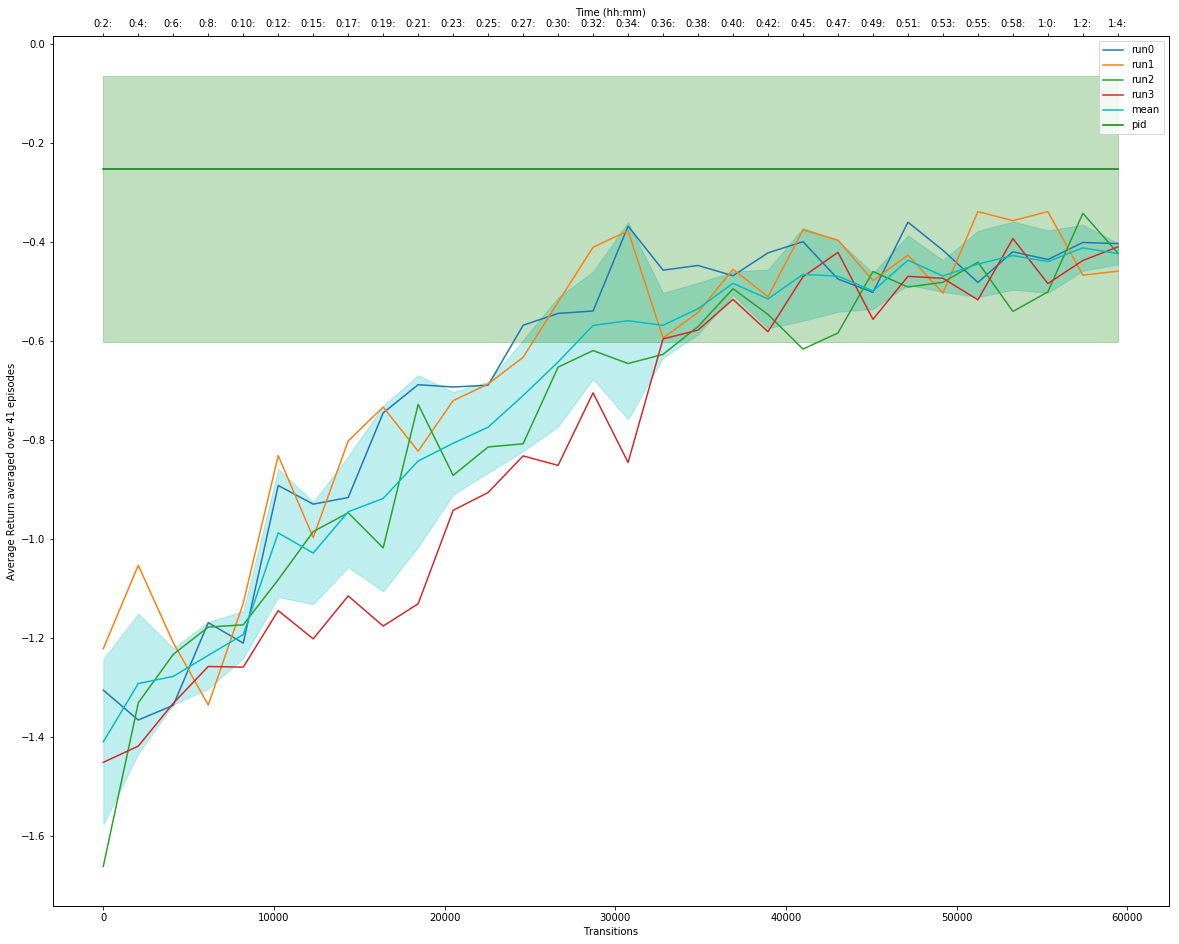

In [80]:
from datetime import datetime, timedelta
stats_list = []
print(files)
for fil in files:
    with open(fil, 'rb') as f:
        stats_list.append( pickle.load(f) ) 
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
times_averaged = np.zeros([len(files), 30])
for i,stats in enumerate(stats_list):
    times_averaged[i] =  stats['time_at_end_update'][:30]
# print(times_averaged)
times_avg  = np.mean(times_averaged, axis =0)
average_returns = np.zeros([len(files), 30]) # for 5 runs
for i,stats in enumerate(stats_list):
#     print(stats['update_eps'][1] - stats['update_eps'][0]) 
    eps_interval = stats['update_eps'][1] - stats['update_eps'][0]
    a = np.array(stats['total_returns'])
    # print(a[:40])
    l = len(a) - len(a)%eps_interval
    a = a[:l]
#     print(len(a))
    # print(a.reshape([-1,20]))
    b = a.reshape([-1,eps_interval])
    c = np.mean(b, axis = 1)
    ax1.plot(np.array(list(range(30)))*41*50, c[:30], label = "run{}".format(i))
    average_returns[i] = c[:30]
    
means = np.mean(average_returns, axis = 0)
std = np.std(average_returns, axis = 0)


ax1.plot(np.array(list(range(30)))*41*50, means, label ='mean', color ='c' )
#     ax.fill_between(list(range(len(list_high))), list_low, list_high,  facecolor='yellow', alpha=0.5)
ax1.fill_between(np.array(list(range(30)))*41*50 ,means - std,means + std, alpha=0.25, color = 'c')    
ax1.set_xlabel('Transitions')
ax1.set_ylabel('Average Return averaged over 41 episodes')
# plt.title("Learning Curves")
avg = -0.253505366726461
std_avg = 0.1663530673925623
avg =  -0.33280930741520465
std_avg  = 0.2691007704511362
ax1.plot(np.array(list(range(30)))*41*50, np.ones([30])*-0.253505366726461, color = 'g', label = 'pid')
ax1.fill_between(np.array(list(range(30)))*41*50 ,np.ones([30])*(avg - std_avg),np.ones([30])*(avg + std_avg), alpha=0.25, color = 'g')    
new_tick_locations = np.array(list(range(30)))*41*50

def tick_function(X):
    
    return [secondsToText3(t)  for t in times_avg]
ax1.legend()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel("Time (hh:mm)")
plt.show()

['./run0/returns/stats.pkl', './run3/returns/stats.pkl', './run4/returns/stats.pkl', './adam_001/returns/stats.pkl']
[[0.64949156 0.76342544 0.68066089 0.71584986 0.60599965 0.65380804
  0.60249439 0.44464227 0.49006762 0.45822205 0.55066472 0.49060634
  0.4112687  0.40283019 0.32027254 0.27304758 0.32288691 0.3453333
  0.34633128 0.27755959 0.34764987 0.30195057 0.31369538 0.26746679
  0.32787101 0.27187922 0.30416317 0.34961435 0.30864405 0.28138796]]
(30,)
(1, 30)
[[0.67390766 0.66614254 0.68982886 0.64585455 0.73953002 0.54427181
  0.6233376  0.51048122 0.49195808 0.58983077 0.444835   0.50581728
  0.46376836 0.40423854 0.34432718 0.33017718 0.33048499 0.38170814
  0.32962525 0.34506972 0.28408338 0.37045848 0.33404661 0.31612097
  0.36344388 0.3004956  0.29911157 0.2832536  0.35189119 0.28544983]]
(30,)
(1, 30)
[[0.68016641 0.81358112 0.64282989 0.68252411 0.72844423 0.67577349
  0.58226439 0.60600709 0.64930187 0.5252455  0.56815075 0.56051306
  0.58422491 0.49130771 0.45427521 0

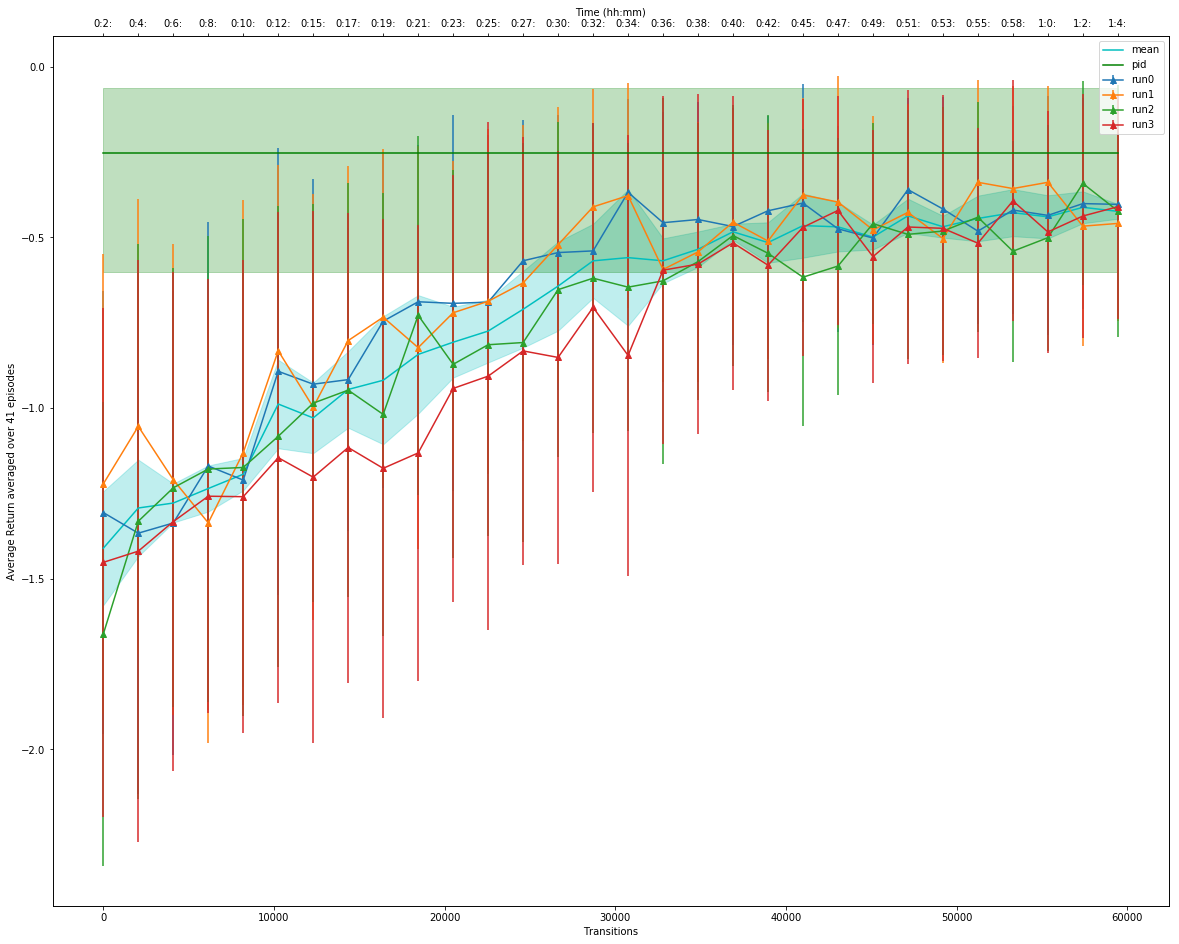

In [98]:
from datetime import datetime, timedelta
stats_list = []
print(files)
for fil in files:
    with open(fil, 'rb') as f:
        stats_list.append( pickle.load(f) ) 
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
times_averaged = np.zeros([len(files), 30])
for i,stats in enumerate(stats_list):
    times_averaged[i] =  stats['time_at_end_update'][:30]
# print(times_averaged)
times_avg  = np.mean(times_averaged, axis =0)
average_returns = np.zeros([len(files), 30]) # for 5 runs
for i,stats in enumerate(stats_list):
#     print(stats['update_eps'][1] - stats['update_eps'][0]) 
    eps_interval = stats['update_eps'][1] - stats['update_eps'][0]
    a = np.array(stats['total_returns'])
    # print(a[:40])
    l = len(a) - len(a)%eps_interval
    a = a[:l]
#     print(len(a))
    # print(a.reshape([-1,20]))
    b = a.reshape([-1,eps_interval])
    c = np.mean(b, axis = 1)
    c_std = np.std(b, axis  =1)[:30].reshape([1, -1])
    print(c_std)
#     ax1.plot(np.array(list(range(30)))*41*50, c[:30], label = "run{}".format(i))
    d = c[:30]
    dstd = c_std[:30]
    print(d.shape)
    print(dstd.shape)
    ax1.errorbar(np.array(list(range(30))).reshape([1,-1])*41*50 , d.reshape([1,-1]), dstd.reshape([1,-1]), marker='^', label = "run{}".format(i))
    average_returns[i] = c[:30]
    
means = np.mean(average_returns, axis = 0)
std = np.std(average_returns, axis = 0)


ax1.plot(np.array(list(range(30)))*41*50, means, label ='mean', color ='c' )
#     ax.fill_between(list(range(len(list_high))), list_low, list_high,  facecolor='yellow', alpha=0.5)
ax1.fill_between(np.array(list(range(30)))*41*50 ,means - std,means + std, alpha=0.25, color = 'c')    
ax1.set_xlabel('Transitions')
ax1.set_ylabel('Average Return averaged over 41 episodes')
# plt.title("Learning Curves")
avg = -0.253505366726461
std_avg = 0.1663530673925623
avg =  -0.33280930741520465
std_avg  = 0.2691007704511362
ax1.plot(np.array(list(range(30)))*41*50, np.ones([30])*-0.253505366726461, color = 'g', label = 'pid')
ax1.fill_between(np.array(list(range(30)))*41*50 ,np.ones([30])*(avg - std_avg),np.ones([30])*(avg + std_avg), alpha=0.25, color = 'g')    
new_tick_locations = np.array(list(range(30)))*41*50

def tick_function(X):
    
    return [secondsToText3(t)  for t in times_avg]
ax1.legend()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel("Time (hh:mm)")
plt.show()

In [38]:
stats['time_at_end_update']

sec = timedelta(stats['time_at_end_update'][-1])
secondsToText2(stats['time_at_end_update'][-1])

'1:21:8'

In [50]:
def secondsToText(secs):
    days = secs//86400
    hours = (secs - days*86400)//3600
    minutes = (secs - days*86400 - hours*3600)//60
    seconds = secs - days*86400 - hours*3600 - minutes*60
    result = ("{0} day{1}, ".format(days, "s" if days!=1 else "") if days else "") + \
    ("{0} hour{1}, ".format(hours, "s" if hours!=1 else "") if hours else "") + \
    ("{0} minute{1}, ".format(minutes, "s" if minutes!=1 else "") if minutes else "") + \
    ("{0} second{1}, ".format(seconds, "s" if seconds!=1 else "") if seconds else "")
    return result
def secondsToText2(secs):
    days = secs//86400
    hours = (secs - days*86400)//3600
    minutes = (secs - days*86400 - hours*3600)//60
    seconds = secs - days*86400 - hours*3600 - minutes*60
    result = ("{0} day{1}, ".format(days, "s" if days!=1 else "") if days else "") + \
    ("{0}:".format(int(hours))) + \
    ("{0}:".format(int(minutes)) ) + \
    ("{0}".format(int(seconds)) ) 
    return result

def secondsToText3(secs):
    days = secs//86400
    hours = (secs - days*86400)//3600
    minutes = (secs - days*86400 - hours*3600)//60
    seconds = secs - days*86400 - hours*3600 - minutes*60
    result = ("{0} day{1}, ".format(days, "s" if days!=1 else "") if days else "") + \
    ("{0}:".format(int(hours))) + \
    ("{0}:".format(int(minutes)) )  
    return result